In [1]:
# Import required libraries
import xarray as xr
from pathlib import Path
import numpy as np
import datetime
import pandas as pd
import cfgrib
import os
import shutil
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [2]:
# Read the original datacube
ds_original = xr.open_dataset(Path.home() / 'hdd1/skondylatos/uc3/greece_big_zipped.nc')
ds_dwd = xr.open_dataset(Path.home() / 'hdd1/diogenis/observatory/dwd_meteo.nc')
ds_bolam = xr.open_dataset(Path.home() / 'hdd1/diogenis/observatory/bolam_meteo.nc')
ds_moloch = xr.open_dataset(Path.home() / 'hdd1/diogenis/observatory/moloch_meteo.nc')

In [3]:
ds_original

<xarray.Dataset>
Dimensions:                  (time: 4560, x: 1253, y: 983)
Coordinates:
  * time                     (time) datetime64[ns] 2009-03-06T10:00:00 ... 20...
  * x                        (x) float64 18.7 18.71 18.72 ... 28.88 28.89 28.9
  * y                        (y) float64 42.3 42.29 42.28 ... 34.32 34.31 34.3
    band                     int64 ...
    spatial_ref              int64 ...
Data variables: (12/90)
    1 km 16 days NDVI        (time, y, x) float32 ...
    1 km 16 days EVI         (time, y, x) float32 ...
    ET_500m                  (time, y, x) float32 ...
    LST_Day_1km              (time, y, x) float32 ...
    LST_Night_1km            (time, y, x) float32 ...
    Fpar_500m                (time, y, x) float32 ...
    ...                       ...
    population_density_2016  (y, x) float32 ...
    population_density_2017  (y, x) float32 ...
    population_density_2018  (y, x) float32 ...
    population_density_2019  (y, x) float32 ...
    population_density_2020  (y, x) float32 ...
    population_density_2021  (y, x) float32 ...
Attributes: (12/37)
    CDI:                        Climate Data Interface version 1.9.9rc1 (http...
    Conventions:                CF-1.6
    history:                    Mon Feb 07 16:26:09 2022: cdo mergetime greec...
    Source_Software:            dbinterface.py, dbexport.py, netcdf_handling.py
    creator_name:               Carolina Arias Munoz
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    ...                         ...
    License:                    Copernicus
    version:                    3.1
    NCO:                        netCDF Operators version 4.7.8 (Homepage = ht...
    cdo_openmp_thread_number:   8
    CDO:                        Climate Data Operators version 1.9.9rc1 (http...
    crs:                        EPSG:4326

In [4]:
ds_dwd

<xarray.Dataset>
Dimensions:         (time: 172, y: 983, x: 1253)
Coordinates:
  * time            (time) datetime64[ns] 2021-07-13T12:00:00 ... 2021-12-31T...
  * x               (x) float64 18.7 18.71 18.72 18.73 ... 28.88 28.89 28.9
  * y               (y) float64 42.3 42.29 42.28 42.27 ... 34.32 34.31 34.3
Data variables: (12/15)
    max_t2m         (time, y, x) float32 ...
    min_t2m         (time, y, x) float32 ...
    avg_t2m         (time, y, x) float32 ...
    max_tp          (time, y, x) float32 ...
    min_tp          (time, y, x) float32 ...
    avg_tp          (time, y, x) float32 ...
    ...              ...
    max_v10         (time, y, x) float32 ...
    min_v10         (time, y, x) float32 ...
    avg_v10         (time, y, x) float32 ...
    max_wind_speed  (time, y, x) float32 ...
    min_wind_speed  (time, y, x) float32 ...
    avg_wind_speed  (time, y, x) float32 ...

In [5]:
ds_bolam

<xarray.Dataset>
Dimensions:         (time: 183, y: 983, x: 1253)
Coordinates:
  * time            (time) datetime64[ns] 2021-05-01 2021-05-02 ... 2021-10-31
  * x               (x) float64 18.7 18.71 18.72 18.73 ... 28.88 28.89 28.9
  * y               (y) float64 42.3 42.29 42.28 42.27 ... 34.32 34.31 34.3
Data variables:
    max_t2m         (time, y, x) float32 ...
    min_relhum_2m   (time, y, x) float32 ...
    max_d2m         (time, y, x) float32 ...
    max_wind_speed  (time, y, x) float32 ...
    max_apcp        (time, y, x) float32 ...

In [6]:
ds_moloch

<xarray.Dataset>
Dimensions:         (time: 182, y: 983, x: 1253)
Coordinates:
  * time            (time) datetime64[ns] 2021-05-01 2021-05-02 ... 2021-10-31
  * x               (x) float64 18.7 18.71 18.72 18.73 ... 28.88 28.89 28.9
  * y               (y) float64 42.3 42.29 42.28 42.27 ... 34.32 34.31 34.3
Data variables:
    max_t2m         (time, y, x) float32 ...
    min_relhum_2m   (time, y, x) float32 ...
    max_d2m         (time, y, x) float32 ...
    max_wind_speed  (time, y, x) float32 ...

Text(0.5, 1.0, 'Moloch 2021-07-14')

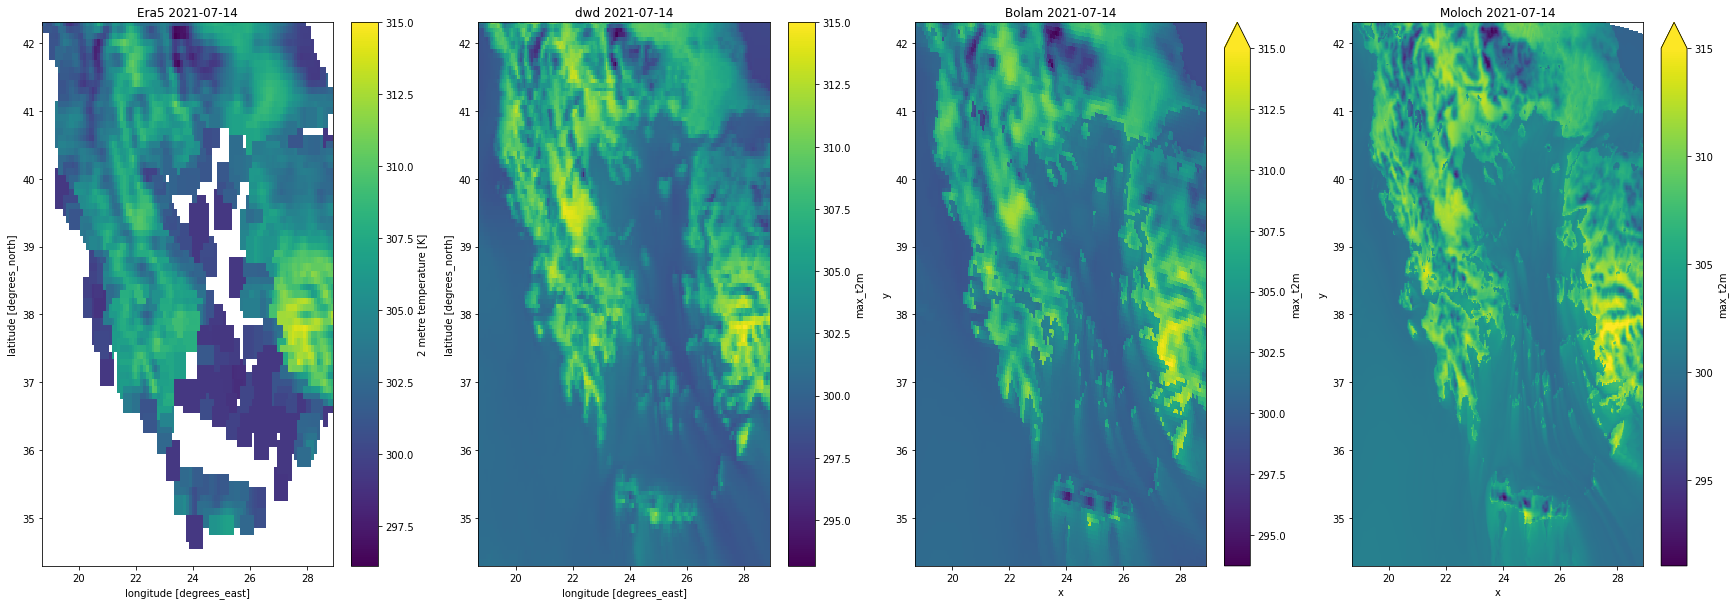

In [7]:
#Qualitative comparison by ploting
fig, axes = plt.subplots(ncols=4, figsize = (30,10))
ds_original.sel(time = '2021-07-14').era5_max_t2m.plot(ax=axes[0], vmax = 315)
axes[0].set_title('Era5 2021-07-14')

ds_dwd.sel(time = '2021-07-14').max_t2m.plot(ax=axes[1] , vmax = 315)
axes[1].set_title('dwd 2021-07-14')

ds_bolam.sel(time = '2021-07-14').max_t2m.plot(ax=axes[2] , vmax = 315)
axes[2].set_title('Bolam 2021-07-14')

ds_moloch.sel(time = '2021-07-14').max_t2m.plot(ax=axes[3] , vmax = 315)
axes[3].set_title('Moloch 2021-07-14')

Text(0.5, 1.0, 'Bolam 2021-07-14')

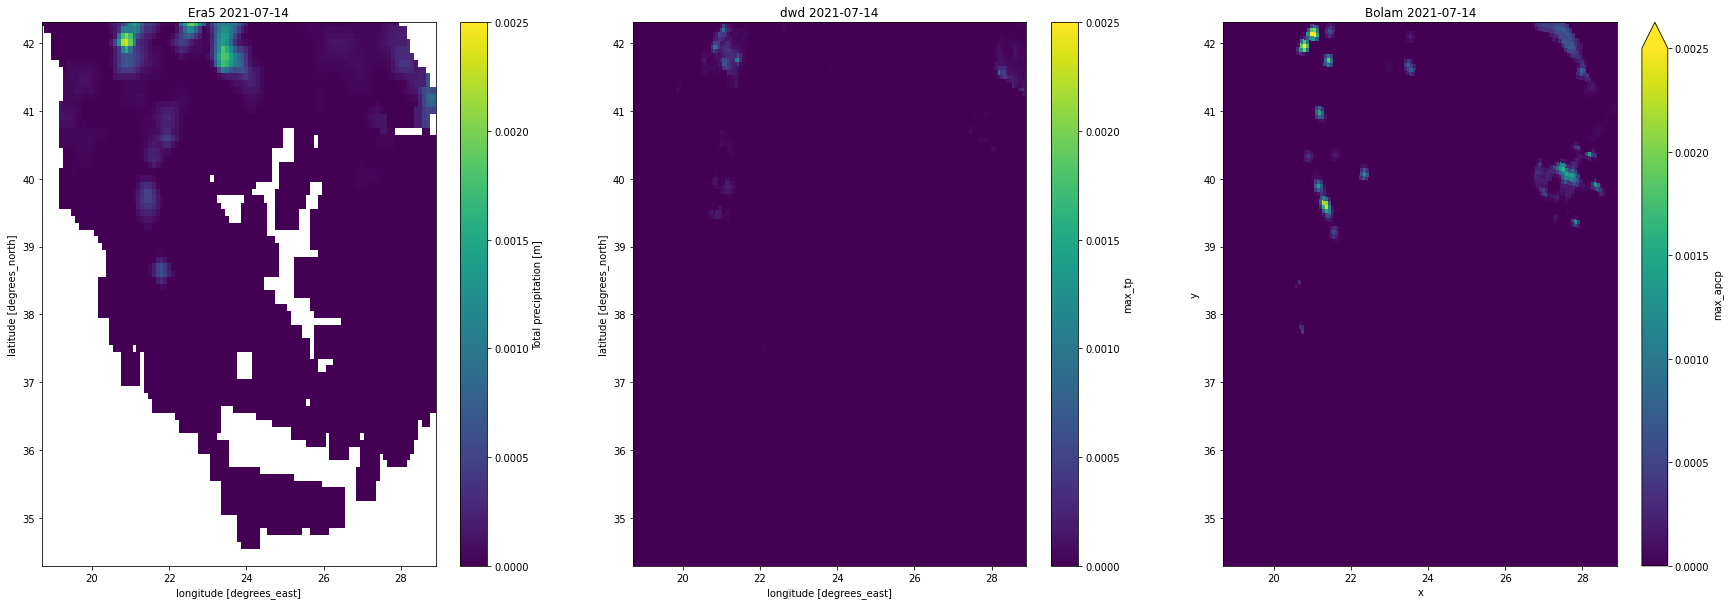

In [8]:
#Qualitative comparison by ploting
fig, axes = plt.subplots(ncols=3, figsize = (30,10))

ds_original.sel(time = '2021-07-14').era5_max_tp.plot(ax=axes[0], vmax = 0.0025)
axes[0].set_title('Era5 2021-07-14')

ds_dwd.sel(time = '2021-07-14').max_tp.plot(ax=axes[1], vmax = 0.0025)
axes[1].set_title('dwd 2021-07-14')

ds_bolam.sel(time = '2021-07-14').max_apcp.plot(ax=axes[2], vmax = 0.0025)
axes[2].set_title('Bolam 2021-07-14')

Text(0.5, 1.0, 'Moloch 2021-07-14')

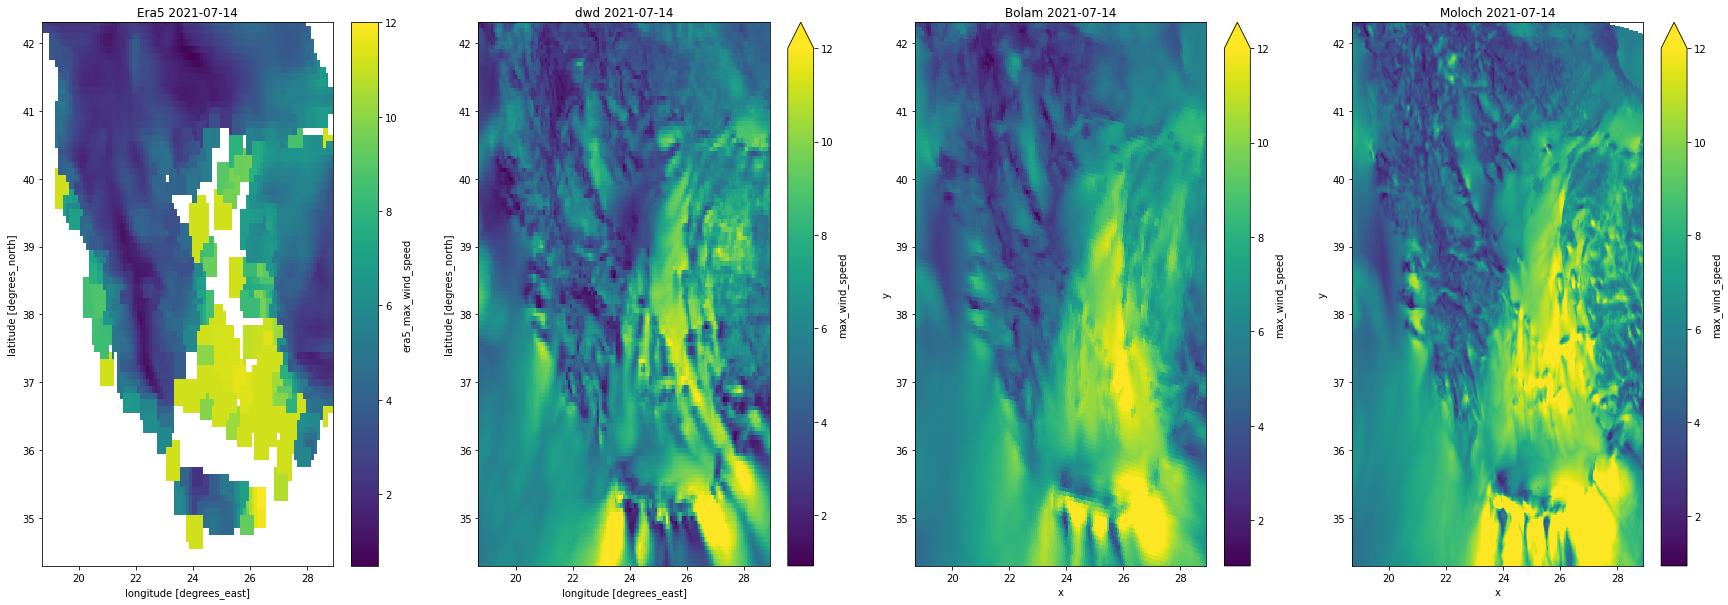

In [9]:
#Qualitative comparison by ploting
fig, axes = plt.subplots(ncols=4, figsize = (30,10))
ds_original.sel(time = '2021-07-14').era5_max_wind_speed.plot(ax=axes[0], vmax = 12)
axes[0].set_title('Era5 2021-07-14')

ds_dwd.sel(time = '2021-07-14').max_wind_speed.plot(ax=axes[1], vmax = 12)
axes[1].set_title('dwd 2021-07-14')

ds_bolam.sel(time = '2021-07-14').max_wind_speed.plot(ax=axes[2], vmax = 12)
axes[2].set_title('Bolam 2021-07-14')

ds_moloch.sel(time = '2021-07-14').max_wind_speed.plot(ax=axes[3], vmax = 12 )
axes[3].set_title('Moloch 2021-07-14')

Text(0.5, 1.0, 'Moloch 2021-07-14')

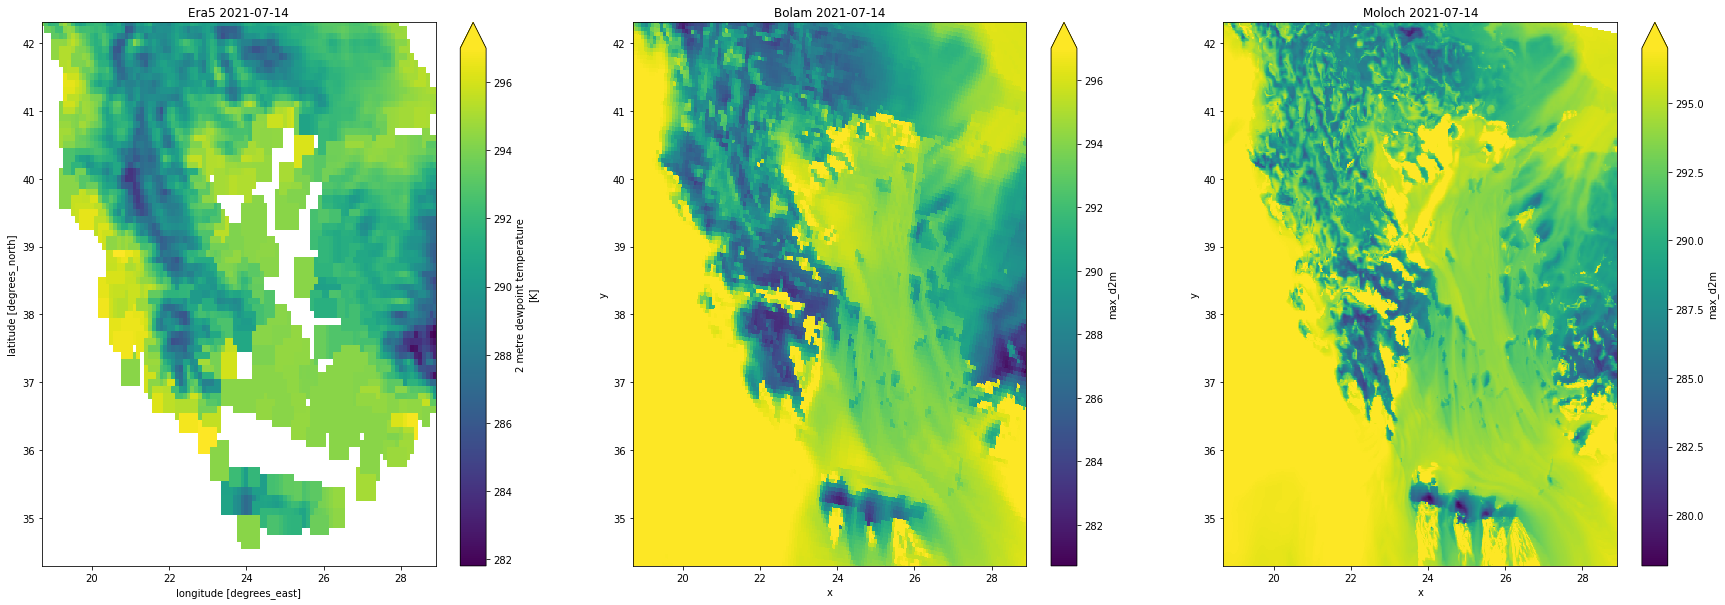

In [11]:
#Qualitative comparison by ploting
fig, axes = plt.subplots(ncols=3, figsize = (30,10))
ds_original.sel(time = '2021-07-14').era5_max_d2m.plot(ax=axes[0], vmax = 297)
axes[0].set_title('Era5 2021-07-14')

ds_bolam.sel(time = '2021-07-14').max_d2m.plot(ax=axes[1], vmax = 297)
axes[1].set_title('Bolam 2021-07-14')

ds_moloch.sel(time = '2021-07-14').max_d2m.plot(ax=axes[2], vmax = 297 )
axes[2].set_title('Moloch 2021-07-14')

Text(0.5, 1.0, 'Moloch 2021-07-14')

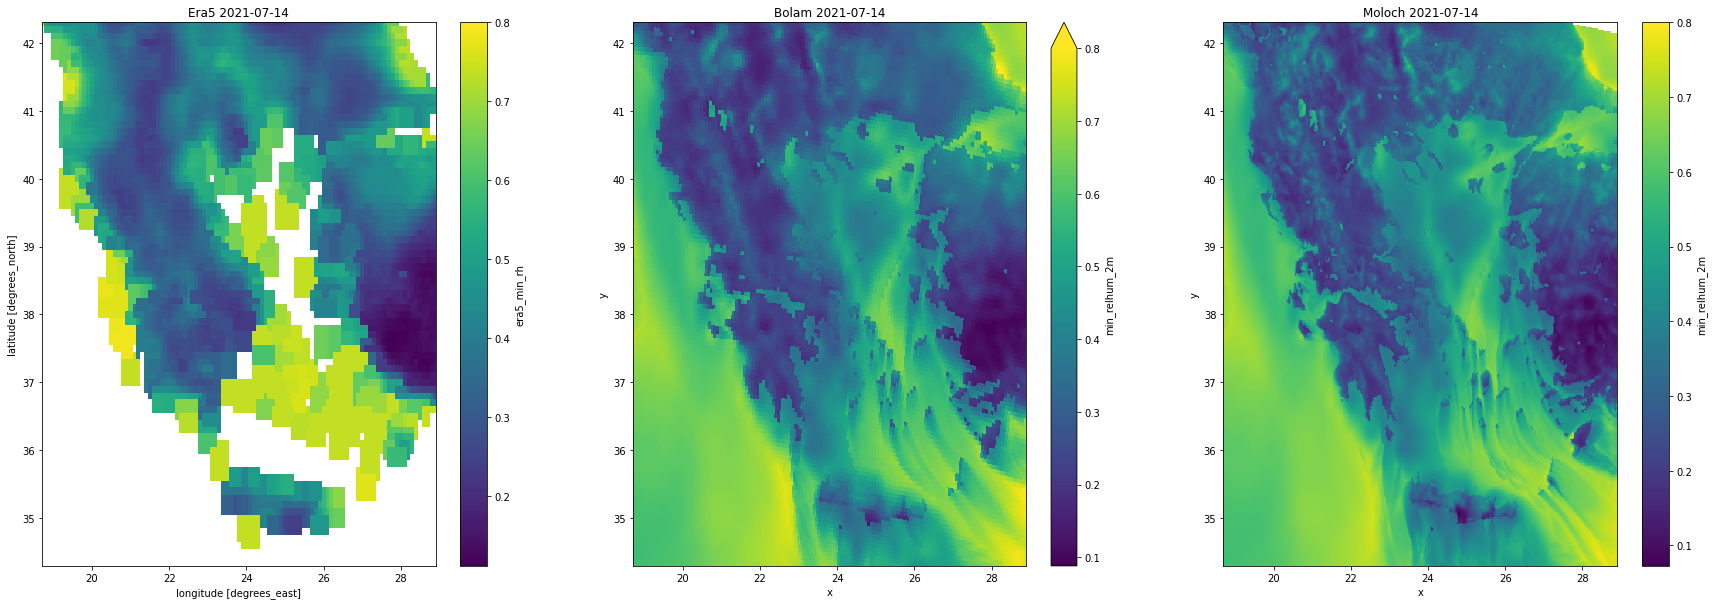

In [12]:
#Qualitative comparison by ploting
fig, axes = plt.subplots(ncols=3, figsize = (30,10))
ds_original.sel(time = '2021-07-14').era5_min_rh.plot(ax=axes[0], vmax = 0.8)
axes[0].set_title('Era5 2021-07-14')

ds_bolam.sel(time = '2021-07-14').min_relhum_2m.plot(ax=axes[1], vmax = 0.8)
axes[1].set_title('Bolam 2021-07-14')

ds_moloch.sel(time = '2021-07-14').min_relhum_2m.plot(ax=axes[2], vmax = 0.8 )
axes[2].set_title('Moloch 2021-07-14')

Text(0.5, 1.0, 'Moloch 2021-08-24')

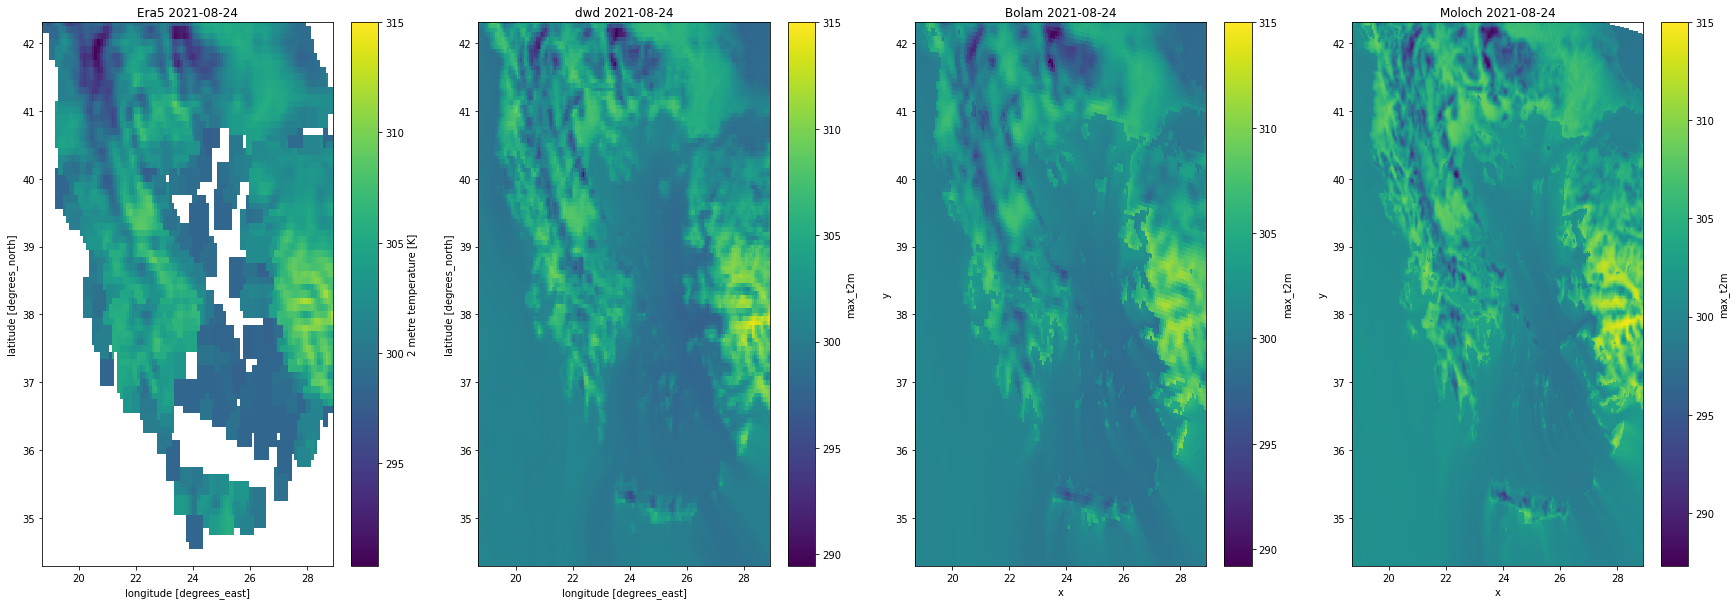

In [13]:
#Qualitative comparison by ploting
fig, axes = plt.subplots(ncols=4, figsize = (30,10))
ds_original.sel(time = '2021-08-24').era5_max_t2m.plot(ax=axes[0], vmax = 315)
axes[0].set_title('Era5 2021-08-24')

ds_dwd.sel(time = '2021-08-24').max_t2m.plot(ax=axes[1] , vmax = 315)
axes[1].set_title('dwd 2021-08-24')

ds_bolam.sel(time = '2021-08-24').max_t2m.plot(ax=axes[2] , vmax = 315)
axes[2].set_title('Bolam 2021-08-24')

ds_moloch.sel(time = '2021-08-24').max_t2m.plot(ax=axes[3] , vmax = 315)
axes[3].set_title('Moloch 2021-08-24')

Text(0.5, 1.0, 'Bolam 2021-08-24')

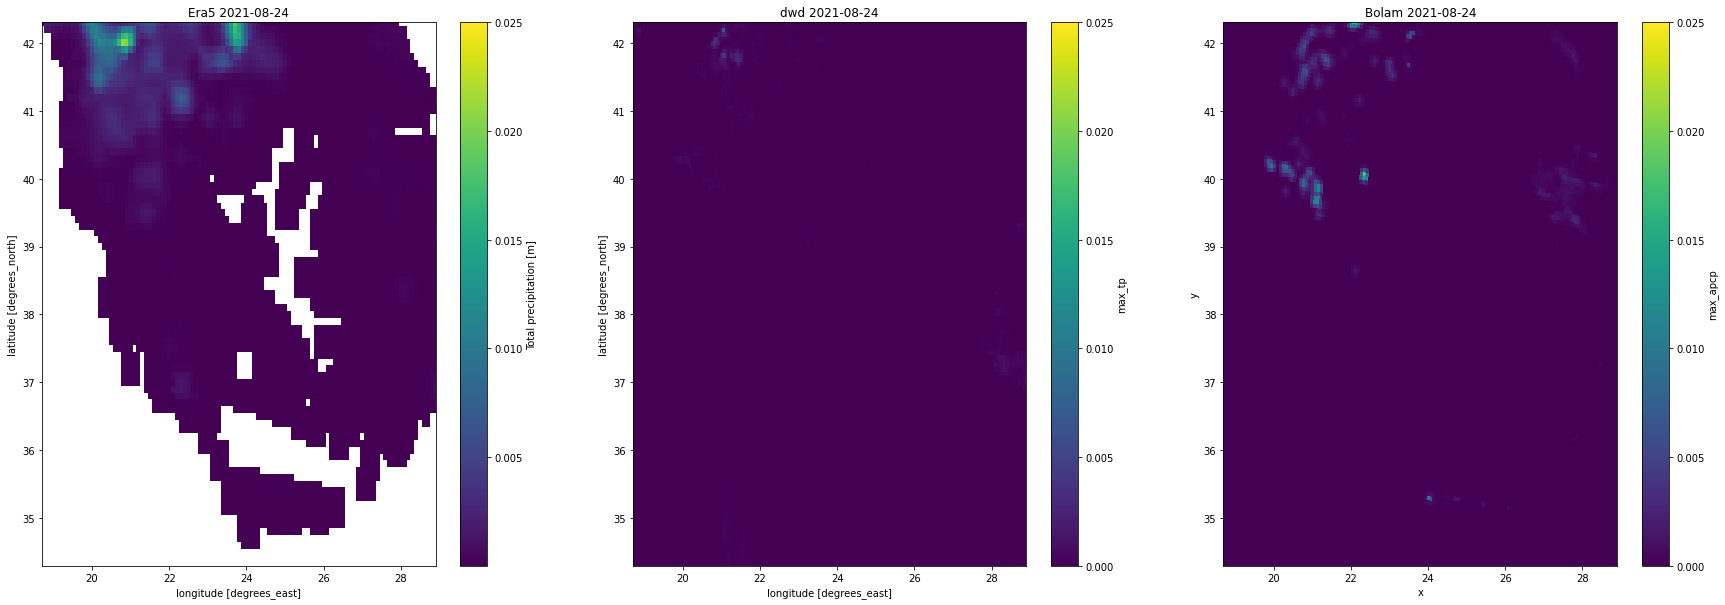

In [14]:
#Qualitative comparison by ploting
fig, axes = plt.subplots(ncols=3, figsize = (30,10))

ds_original.sel(time = '2021-08-24').era5_max_tp.plot(ax=axes[0], vmax = 0.025)
axes[0].set_title('Era5 2021-08-24')

ds_dwd.sel(time = '2021-08-24').max_tp.plot(ax=axes[1], vmax = 0.025)
axes[1].set_title('dwd 2021-08-24')

ds_bolam.sel(time = '2021-08-24').max_apcp.plot(ax=axes[2], vmax = 0.025)
axes[2].set_title('Bolam 2021-08-24')

Text(0.5, 1.0, 'Moloch 2021-08-24')

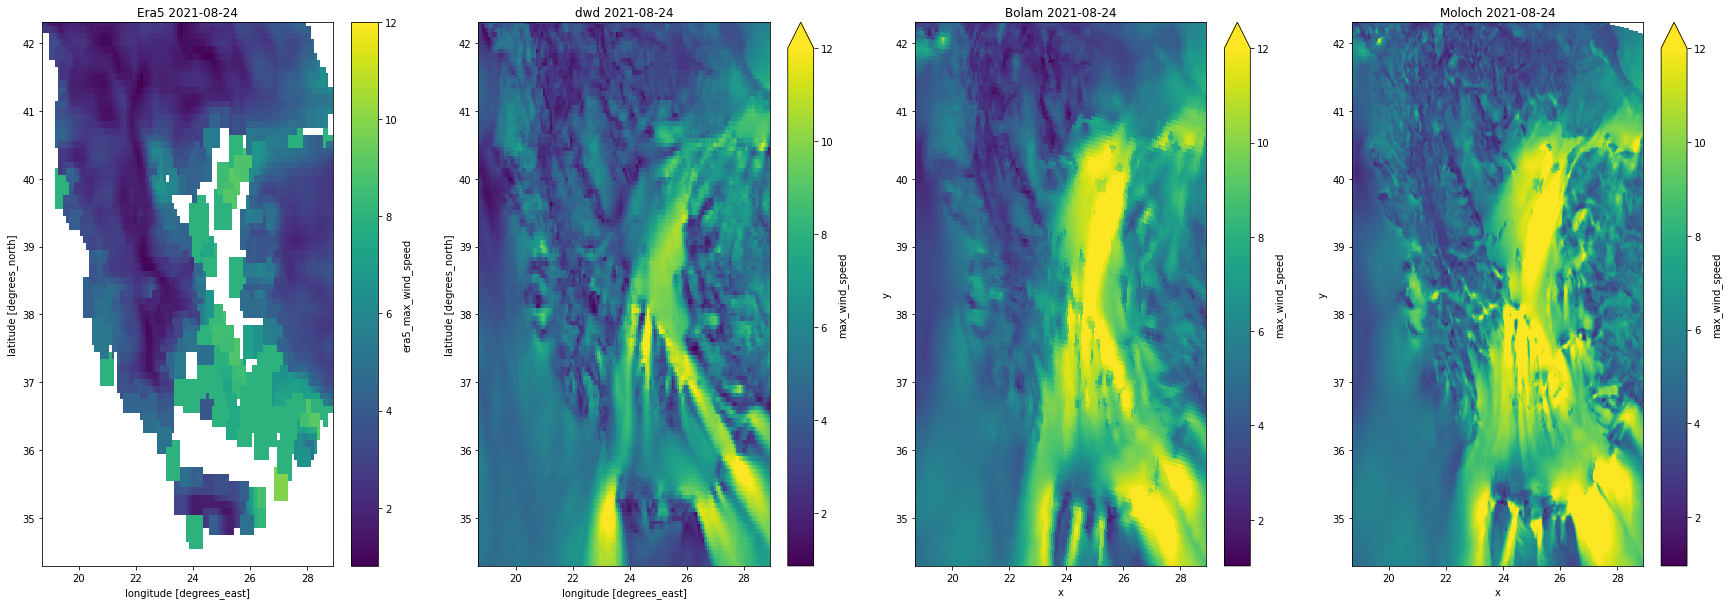

In [15]:
#Qualitative comparison by ploting
fig, axes = plt.subplots(ncols=4, figsize = (30,10))
ds_original.sel(time = '2021-08-24').era5_max_wind_speed.plot(ax=axes[0], vmax = 12)
axes[0].set_title('Era5 2021-08-24')

ds_dwd.sel(time = '2021-08-24').max_wind_speed.plot(ax=axes[1], vmax = 12)
axes[1].set_title('dwd 2021-08-24')

ds_bolam.sel(time = '2021-08-24').max_wind_speed.plot(ax=axes[2], vmax = 12)
axes[2].set_title('Bolam 2021-08-24')

ds_moloch.sel(time = '2021-08-24').max_wind_speed.plot(ax=axes[3], vmax = 12 )
axes[3].set_title('Moloch 2021-08-24')

Text(0.5, 1.0, 'Moloch 2021-08-24')

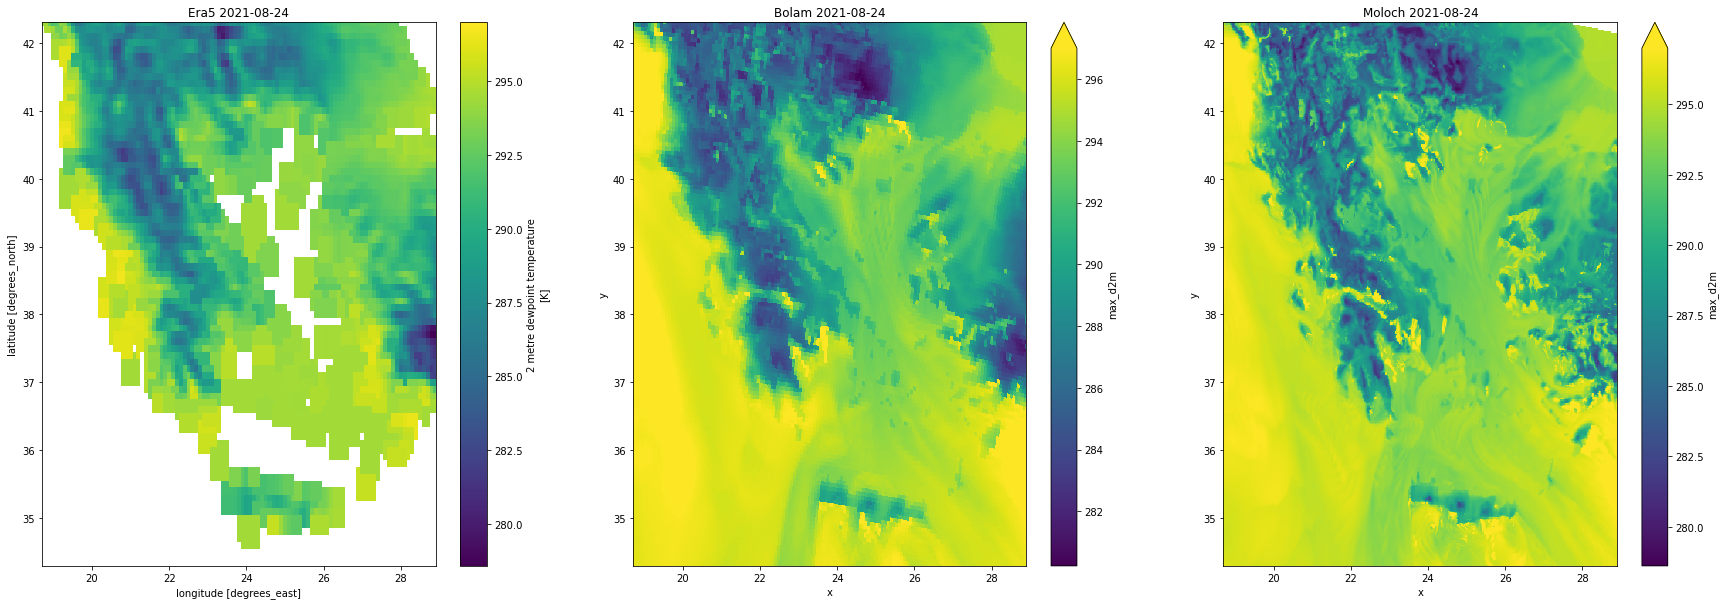

In [16]:
#Qualitative comparison by ploting
fig, axes = plt.subplots(ncols=3, figsize = (30,10))
ds_original.sel(time = '2021-08-24').era5_max_d2m.plot(ax=axes[0], vmax = 297)
axes[0].set_title('Era5 2021-08-24')

ds_bolam.sel(time = '2021-08-24').max_d2m.plot(ax=axes[1], vmax = 297)
axes[1].set_title('Bolam 2021-08-24')

ds_moloch.sel(time = '2021-08-24').max_d2m.plot(ax=axes[2] , vmax = 297)
axes[2].set_title('Moloch 2021-08-24')

Text(0.5, 1.0, 'Moloch 2021-08-24')

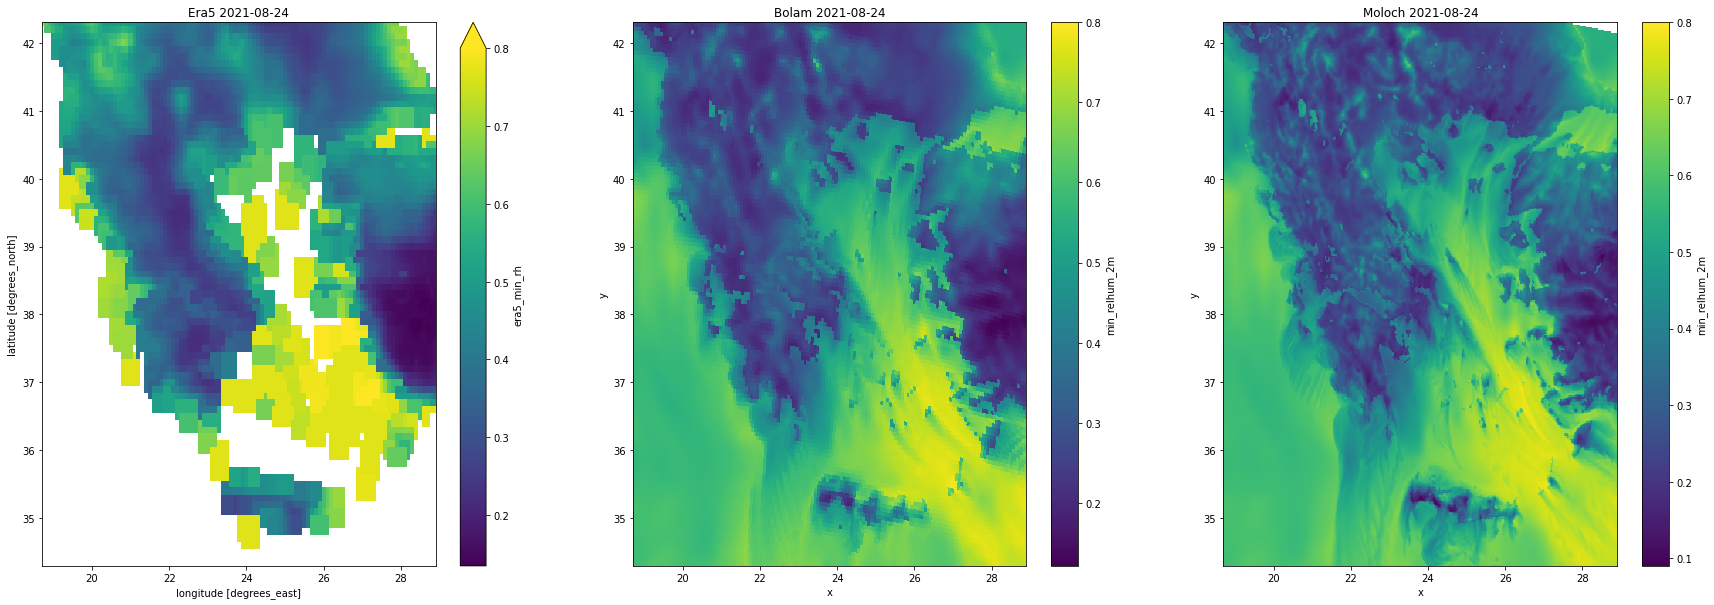

In [17]:
#Qualitative comparison by ploting
fig, axes = plt.subplots(ncols=3, figsize = (30,10))
ds_original.sel(time = '2021-08-24').era5_min_rh.plot(ax=axes[0], vmax = 0.8)
axes[0].set_title('Era5 2021-08-24')

ds_bolam.sel(time = '2021-08-24').min_relhum_2m.plot(ax=axes[1], vmax = 0.8)
axes[1].set_title('Bolam 2021-08-24')

ds_moloch.sel(time = '2021-08-24').min_relhum_2m.plot(ax=axes[2], vmax = 0.8 )
axes[2].set_title('Moloch 2021-08-24')